In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
import os
import sys
import glob
import random

from pprint import pprint
from ipywidgets import Video

from PIL import Image
from PIL.ExifTags import TAGS

In [2]:
def imshow(a):
  a = a.clip(0, 255).astype('uint8')
  if a.ndim == 3:
    if a.shape[2] == 4:
      a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
    else:
      a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
  display(PIL.Image.fromarray(a))

In [3]:
video_path = './data/0.mp4'
write_path = './movie.avi'

In [46]:
traffic = cv2.VideoCapture(video_path)
if traffic.isOpened():
    print('Film wczytany!')

traffic_width = int(traffic.get(3))
traffic_height = int(traffic.get(4))

print(traffic_height, traffic_width)

traffic_fps = traffic.get(cv2.CAP_PROP_FPS)
print(traffic_fps)

Film wczytany!
1080 1920
30.0


In [47]:
Video.from_file(video_path)

Video(value=b'\x00\x00\x00\x18ftypmp42\x00\x00\x00\x00mp41isom\x00\x00\x00(uuid\\\xa7\x08\xfb2\x8eB\x05\xa8ae\…

In [48]:
feature_params = dict(maxCorners=100,
                      qualityLevel=0.3,
                      minDistance=7,
                      blockSize=7)
lk_params = dict(winSize=(15,15),
                 maxLevel=2,
                criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0,255,(100,3))

In [58]:
traffic.set(cv2.CAP_PROP_POS_FRAMES, 0)
ret, old_frame = traffic.read()

old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
# p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)
####################################################################### NEW
circles = cv2.HoughCircles(old_gray,cv2.HOUGH_GRADIENT,1,10, param1=100,param2=10,minRadius=10,maxRadius=20)
circles = np.uint16(np.around(circles))
p0 = circles[...,:2].reshape(circles.shape[1],1,2).astype('float')

#######################################################################
mask = np.zeros_like(old_frame)

In [59]:
p0 = p0.astype('float32')

In [60]:
traffic_optical_flow = cv2.VideoWriter(write_path, cv2.VideoWriter_fourcc(*'DIVX'), traffic_fps, (traffic_width, traffic_height))

traffic.set(cv2.CAP_PROP_POS_FRAMES, 0)
while traffic.isOpened():
    ret, frame = traffic.read()
    if ret:
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
        if p1 is not None:
            good_new = p1[st==1]
            good_old = p0[st==1]

        for i,(new,old) in enumerate(zip(good_new, good_old)):
            a,b = new.ravel()
            c,d = old.ravel()
            mask = cv2.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 2)
            frame = cv2.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)

        old_gray = frame_gray.copy()
        p0 = good_new.reshape(-1,1,2)

        traffic_optical_flow.write(cv2.add(frame, mask))
    else:
        break

traffic_optical_flow.release()

In [61]:
!ffmpeg -hide_banner -loglevel error -i movie.avi -y movie.mp4

In [62]:
Video.from_file('./movie.mp4')

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x11\xe1\x92mdat\x0…

# Circles

In [106]:
traffic.set(cv2.CAP_PROP_POS_FRAMES, 0)
ret, old_frame = traffic.read()

old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)
mask = np.zeros_like(old_frame)

In [104]:
traffic_optical_flow = cv2.VideoWriter(write_path, cv2.VideoWriter_fourcc(*'DIVX'), traffic_fps, (traffic_width, traffic_height))

traffic.set(cv2.CAP_PROP_POS_FRAMES, 0)
while traffic.isOpened():
    ret, frame = traffic.read()
    if ret:
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
       
        
#         p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
#         if p1 is not None:
#             good_new = p1[st==1]
#             good_old = p0[st==1]

        for i,(new,old) in enumerate(zip(good_new, good_old)):
            a,b = new.ravel()
            c,d = old.ravel()
            mask = cv2.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 2)
            frame = cv2.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)

        old_gray = frame_gray.copy()
        p0 = good_new.reshape(-1,1,2)

        traffic_optical_flow.write(cv2.add(frame, mask))
    else:
        break


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

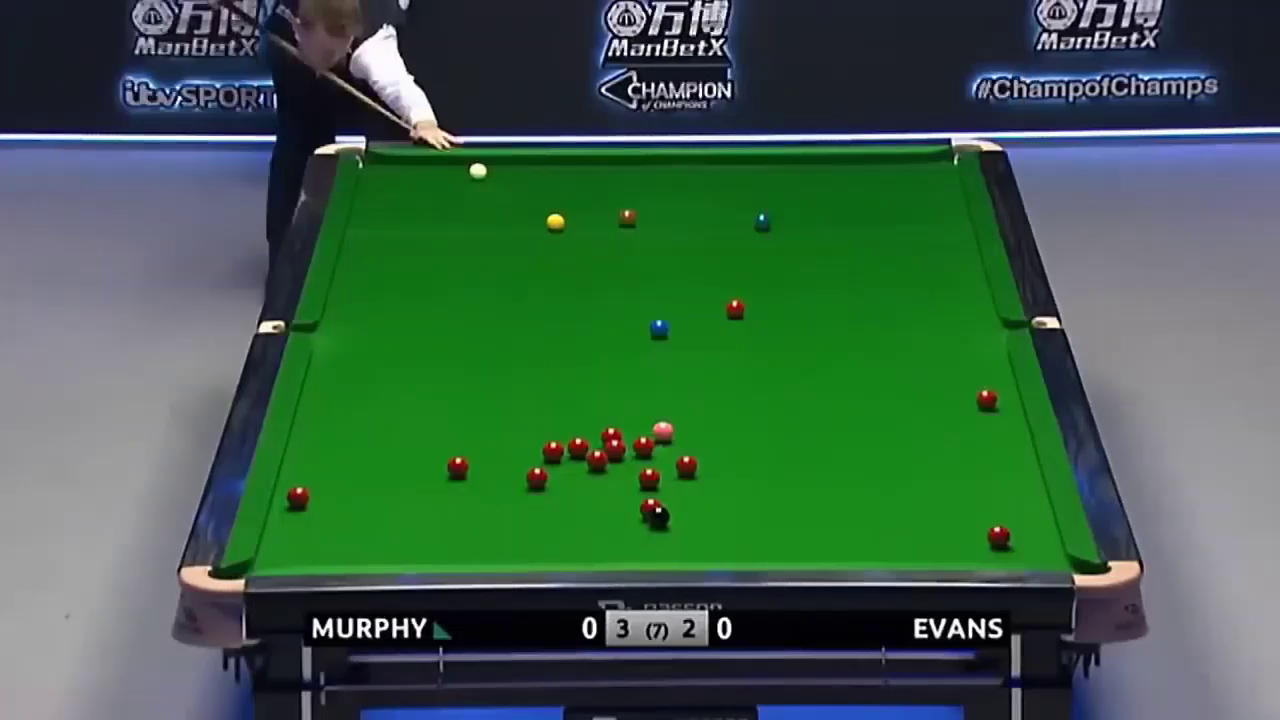

In [110]:
imshow(old_frame)

Znalezionych okręgów: 89


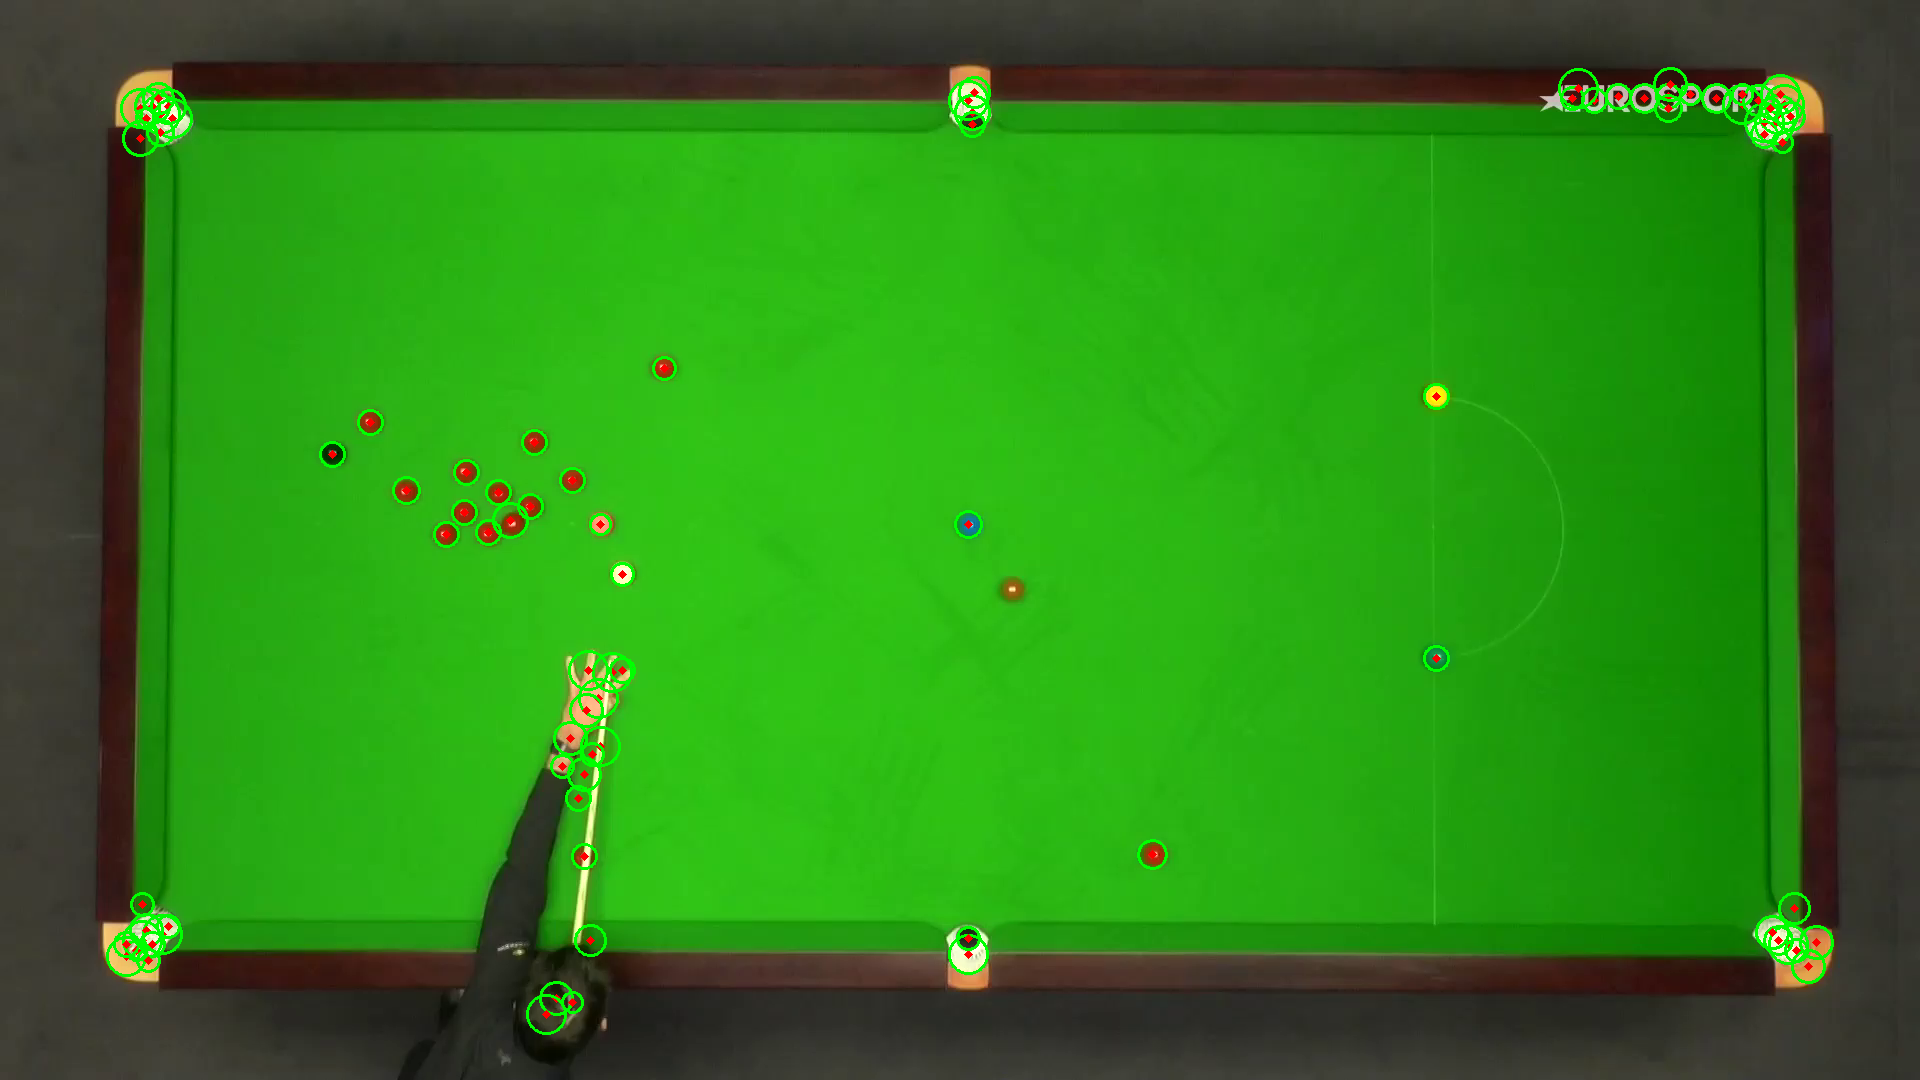

In [35]:
traffic.set(cv2.CAP_PROP_POS_FRAMES, 0)
ret, old_frame = traffic.read()

old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)
mask = np.zeros_like(old_frame)

skittles_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

# circles = cv2.HoughCircles(skittles_gray, cv2.HOUGH_GRADIENT, 1, 50, param1=70, param2=10, minRadius=6, maxRadius=20)
circles = cv2.HoughCircles(skittles_gray,cv2.HOUGH_GRADIENT,1,10, param1=100,param2=10,minRadius=10,maxRadius=20)
circles = np.uint16(np.around(circles))
p0 = circles[...,:2].reshape(circles.shape[1],1,2)
print('Znalezionych okręgów:', len(circles[0]))
for i in circles[0, :]:
    cv2.circle(old_frame,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(old_frame,(i[0],i[1]),2,(0,0,255),3)
imshow(old_frame)

In [44]:
circles[...,:2].reshape(circles.shape[1],1,2)

array([[[1644,   98]],

       [[ 968,  954]],

       [[1788,  944]],

       [[1778,  114]],

       [[ 968,  100]],

       [[1716,   98]],

       [[ 160,  114]],

       [[ 142,  940]],

       [[1774,  124]],

       [[ 162,  934]],

       [[ 332,  454]],

       [[ 968,  938]],

       [[ 172,  118]],

       [[ 534,  442]],

       [[1436,  396]],

       [[1764,  122]],

       [[ 152,  106]],

       [[ 584,  856]],

       [[ 572,  480]],

       [[ 406,  490]],

       [[ 446,  534]],

       [[ 498,  492]],

       [[1778,  940]],

       [[1668,   96]],

       [[ 530,  506]],

       [[1742,  104]],

       [[ 972,  112]],

       [[ 622,  574]],

       [[ 600,  524]],

       [[ 612,  672]],

       [[1758,  100]],

       [[ 464,  512]],

       [[1780,   94]],

       [[1784,  104]],

       [[ 598,  698]],

       [[1152,  854]],

       [[1790,  116]],

       [[ 370,  422]],

       [[ 588,  670]],

       [[1594,  100]],

       [[ 146,  930]],

       [[1772,  